In [ ]:
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt

# Exploring the Relationship Between Regression Slope and Deep Learning Model Performance

In [ ]:
def model_training(learning_rate, epoches_num, loss_function, x, y):
  ANN_reg = nn.Sequential(
    nn.Linear(1, 1), # input layer
    nn.ReLU(), # activation layer
    nn.Linear(1, 1) # output layer
    )
  gradient_descent = torch.optim.SGD(ANN_reg.parameters(), lr=learning_rate)
  losses = torch.zeros(epoches_num)

  for i in range(epoches_num):
    y_hat = ANN_reg(x)

    loss = loss_function(y_hat, y)
    #losses[i] = loss

    gradient_descent.zero_grad()
    loss.backward()
    gradient_descent.step()

  return y_hat, loss


In [ ]:
def data(m , N):
  x = torch.randn(N, 1)
  y = m*x + torch.randn(N, 1) / 2
  return x, y

In [ ]:
learning_rate = 0.05
loss_function = nn.MSELoss()
epoches_num = 500
N = 50

In [ ]:
steps = np.linspace(-2, 2, 21)

In [ ]:
avg_y_hat = torch.zeros(len(steps), N, 1)
avg_y = torch.zeros(len(steps), N, 1)
avg_losses = torch.zeros(len(steps))
num_experiments = 50
for i in range(num_experiments):
  for j in range(len(steps)):
    m = steps[j]
    x, y = data(m, N)
    avg_y[j] += y/num_experiments
    y_hat, losses = model_training(learning_rate, epoches_num, loss_function, x, y)
    avg_y_hat[j] += y_hat/num_experiments
    avg_losses[j] += losses/num_experiments


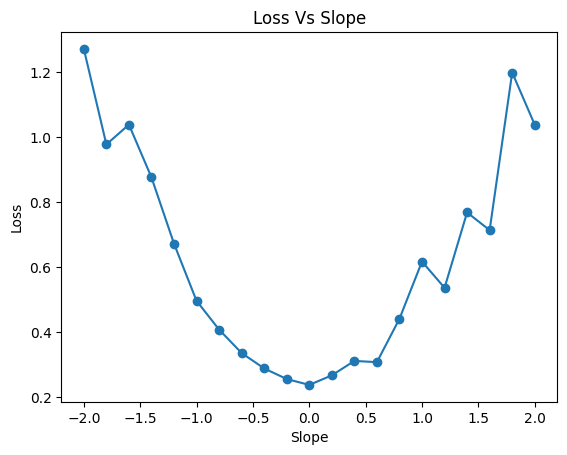

In [ ]:
plt.plot(steps, avg_losses.detach(), 'o-')
plt.xlabel('Slope')
plt.ylabel('Loss')
plt.title('Loss Vs Slope')
plt.show()

In [ ]:
corr = np.zeros(len(steps))
for i in range(len(steps)):
  corr[i] = np.corrcoef(avg_y[i].T,avg_y_hat[i].detach().T)[0,1]

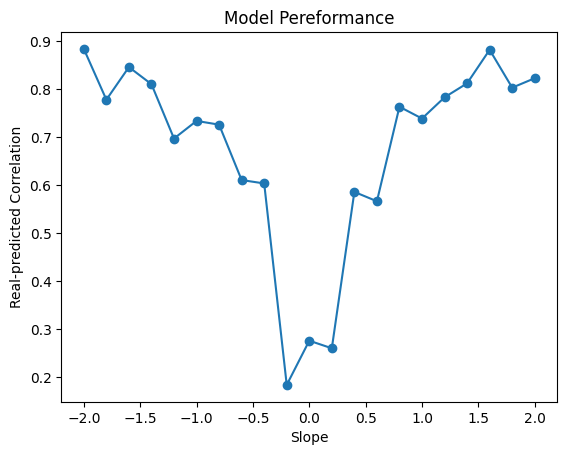

In [ ]:
plt.plot(steps, corr, 'o-')
plt.xlabel('Slope')
plt.ylabel('Real-predicted Correlation')
plt.title('Model Pereformance')
plt.show()

# 3- Classification Problem

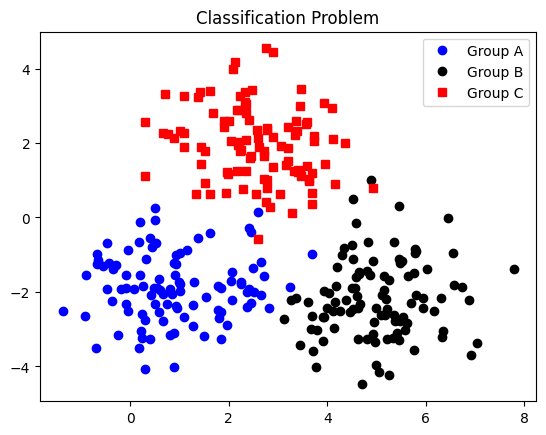

In [ ]:
n_per_clust = 100
standard_dev = 1

# Defining Centers for Clusters
A = [1, -2]
B = [5, -2]
C = [2.5, 2]

# Generate data

# a and b represent the coordinates of the data points in each cluster
a = [A[0] + np.random.randn(n_per_clust) * standard_dev, A[1] + np.random.randn(n_per_clust) * standard_dev]
b = [B[0] + np.random.randn(n_per_clust) * standard_dev, B[1] + np.random.randn(n_per_clust) * standard_dev]
c = [C[0] + np.random.randn(n_per_clust) * standard_dev, C[1] + np.random.randn(n_per_clust) * standard_dev]

# Corrected labels and data arrays
labels_np = np.vstack([np.zeros((n_per_clust, 1)), np.ones((n_per_clust, 1)), np.ones((n_per_clust, 1)) * 2])
data_np = np.hstack((a, b, c)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bo', label='Group A')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko', label='Group B')
plt.plot(data[np.where(labels == 2)[0], 0], data[np.where(labels == 2)[0], 1], 'rs', label='Group C')
plt.title("Classification Problem")
plt.legend()

In [ ]:
def create_model(learning_rate):
  Ann_model = nn.Sequential(
    nn.Linear(2, 64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64, 3)
  )
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(Ann_model.parameters(), lr=learning_rate)
  return Ann_model, loss_function, optimizer

In [ ]:
def train_model(num_epoches, Ann_model, loss_function, optimizer):
  losses = torch.zeros(num_epoches)
  acc_epoches = []

  for epoch_i in range(num_epoches):
    # forward pass
    y_hat = Ann_model(data)

    # compute loss
    loss = loss_function(y_hat, labels)
    losses[epoch_i] = loss

    # back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute accuracy
    matches = (torch.argmax(y_hat, axis=1) == labels).float()
    acc = 100*torch.mean(matches)
    acc_epoches.append(acc)

  predictions = Ann_model(data)
  prediction_category = torch.argmax(predictions, axis=1)
  sm = nn.Softmax(dim=1)
  probabilities = sm(predictions)

  final_acc = 100* torch.mean(( prediction_category == labels).float())
  return probabilities, acc_epoches, losses, final_acc

In [ ]:
Ann_model, loss_function, optimizer = create_model(learning_rate=0.1)
labels = labels.flatten().long()
probabilities, acc_epoches, losses, final_acc = train_model(num_epoches=1500, Ann_model=Ann_model,
                                                            loss_function=loss_function, optimizer=optimizer)

Final accuracy: 99.0


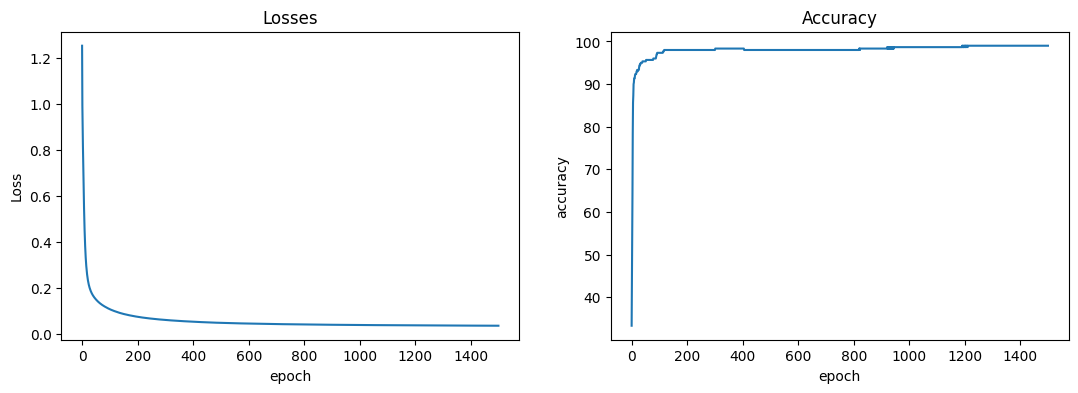

In [ ]:
# report accuracy
print(f'Final accuracy: {final_acc}')

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(acc_epoches)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

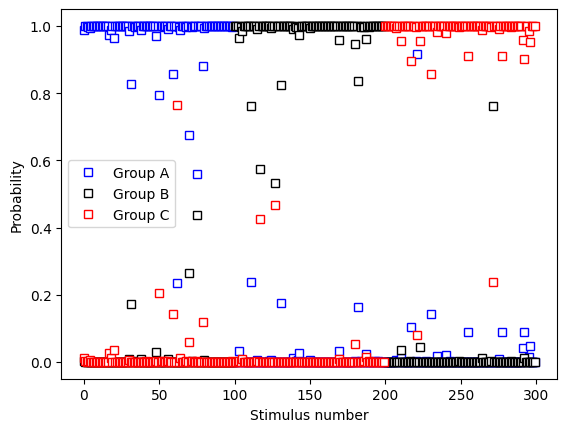

In [ ]:
probabilities_np = probabilities.detach().numpy()

# Plot each group with a different color
plt.plot(probabilities_np[:, 0], 's', color='blue', markerfacecolor='w', label='Group A')
plt.plot(probabilities_np[:, 1], 's', color='black', markerfacecolor='w', label='Group B')
plt.plot(probabilities_np[:, 2], 's', color='red', markerfacecolor='w', label='Group C')

# Add labels and legend
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend()

# Display the plot
plt.show()

# ANN Multi-Layer Using Classes

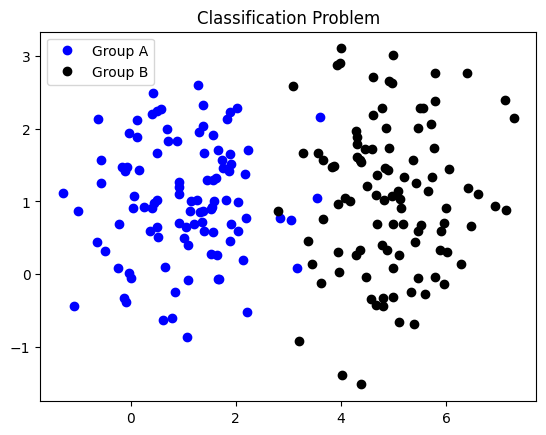

In [ ]:
n_per_clust = 100
standard_dev = 1

# Defining Centers for Clusters
A = [1, 1]
B = [5, 1]

# Generate data

# a and b represent the coordinates of the data points in each cluster
a = [A[0] + np.random.randn(n_per_clust)*standard_dev, A[1] + np.random.randn(n_per_clust) * standard_dev]
b = [B[0] + np.random.randn(n_per_clust)*standard_dev, B[1] + np.random.randn(n_per_clust) * standard_dev]

labels_np = np.vstack((np.zeros((n_per_clust, 1)), np.ones((n_per_clust, 1))))
data_np = np.hstack((a, b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bo', label='Group A')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko', label='Group B')
plt.title("Classification Problem")
plt.legend()

In [ ]:
import torch.nn.functional as F
class Ann_multi_layer(nn.Module):
  def __init__(self):
    super().__init__()
    self.input = nn.Linear(2, 16)
    self.hidden_layer = nn.Linear(16, 1)
    self.output = nn.Linear(1, 1)
  def forward(self, x):
    x = self.input(x)
    x = F.relu(x)
    x = self.hidden_layer(x)
    x = F.relu(x)
    x = self.output(x)
    return x

def create_multi_layer_model(learning_rate):
  Ann_model = Ann_multi_layer()
  loss_function = nn.BCEWithLogitsLoss()
  optimizer = torch.optim.SGD(Ann_model.parameters(), lr=learning_rate)
  return Ann_model, loss_function, optimizer

In [ ]:
def train_model(Ann_model, num_epoches, data, labels, optimizer, loss_function):
  losses = torch.zeros(num_epoches)
  for i in range(num_epoches):
    # forward pass
    y_hat = Ann_model(data)

    # loss calculation
    loss = loss_function(y_hat, labels)
    losses[i] = loss

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  prediction = Ann_model(data)
  accuracy = 100 * torch.mean(((prediction>0) == labels).float())
  return prediction, accuracy, losses

## Running Experiment

In [ ]:
learning_rate = np.linspace(0.001, 1, 50)
acc_multi_by_lr = []
num_epoches = 1500

for lr_i, lr in enumerate(learning_rate):
  # create model
  classify_model, loss_fun, optimizer = create_multi_layer_model(lr)
  # train model
  prediction, acc, losses = train_model(Ann_model=classify_model, num_epoches=num_epoches, data=data,
                                        labels=labels, optimizer=optimizer, loss_function=loss_fun)
  # store result
  acc_multi_by_lr.append(acc)

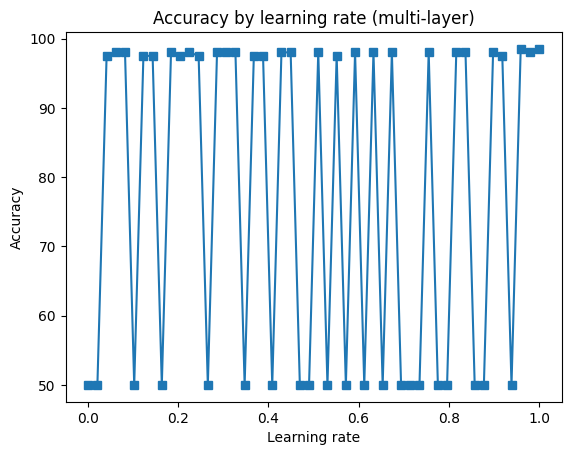

In [ ]:
plt.plot(learning_rate,acc_multi_by_lr,'s-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate (multi-layer)')
plt.show()